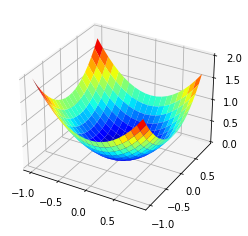

In [2]:
# 3d plot of the test function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0

# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

# compute targets
results = objective(x, y)

# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
pyplot.show()

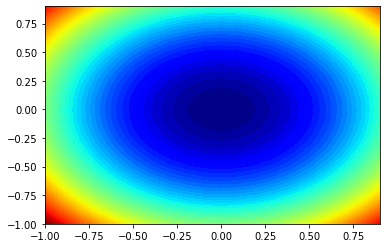

In [3]:
# contour plot of the test function
from numpy import asarray
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)

# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)

# compute targets
results = objective(x, y)

# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
pyplot.show()

In [4]:
# gradient descent optimization with adam for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
 
# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent updates
    for t in range(n_iter):
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            # m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            # v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            # mhat(t) = m(t) / (1 - beta1(t))
            mhat = m[i] / (1.0 - beta1**(t+1))
            # vhat(t) = v(t) / (1 - beta2(t))
            vhat = v[i] / (1.0 - beta2**(t+1))
            # x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]
 
# seed the pseudo random number generator
seed(1)
#source: https://machinelearningmastery.com/adam-optimization-from-scratch/

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(